In [224]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [225]:
df = pd.read_csv(r'C:\Users\30272\Desktop\Machine_Learning\My_Notes\Linear regression models\Code_Jupyter\data\regress_data1.csv', header=0, names=['features_1', 'features_2'])
df.head() # 显示前5行数据

,features_1,features_2
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [226]:
df = pd.DataFrame(df) # 将数据集转化为DataFrame格式
df.head() # 显示前5行数据

,features_1,features_2
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


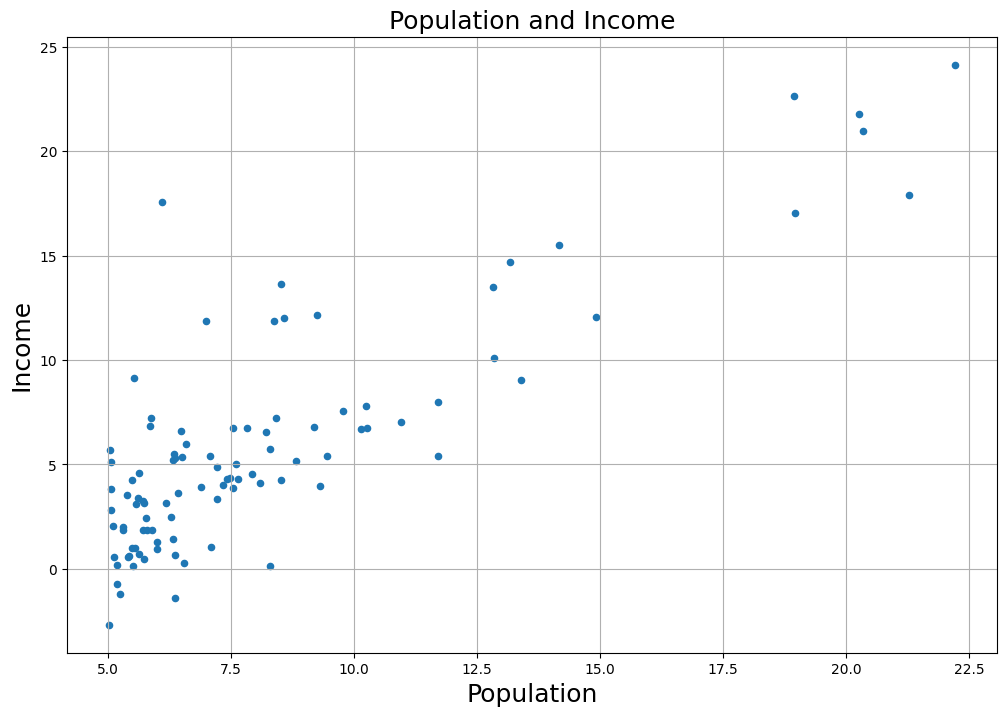

In [227]:
df.plot(kind='scatter', x='features_1', y='features_2', figsize=(12,8)) # plotting the data 指定绘图的类型为散点图（Scatter Plot）
# 设置x轴标签
plt.xlabel('Population', fontsize=18)
# 设置y轴标签，并将标签旋转为竖直方向
plt.ylabel('Income', rotation=90, fontsize=18)
# 设置标题
plt.title('Population and Income', fontsize=18)
# 设置网格线为可见
plt.grid(True)
# 显示图形
plt.show()

In [228]:
X = df['features_1'].values # 提取特征1（X）
y = df['features_2'].values # 提取特征2（y）
X = X.reshape(-1, 1) # 将X转化为二维数组（列向量）
y = y.reshape(-1, 1) # 将y转化为二维数组（列向量）
print('X:',X[0:5],'\n','\n', 'y:',y[0:5]) # 显示前5行数据
n = len(X) # 计算样本数量

X: [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]] 
 
 y: [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


线性回归模型

$$h_\theta(x) = \theta_0 + \theta_1 x$$

（1）$\theta_0 ：$代价函数的梯度（导数）

$$\theta_0 = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)$$

（2）$\theta_1 ：$代价函数的梯度（导数）

$$\theta_1 = \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i) x_i$$

$$\theta_0 = \theta_0 - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i)$$

$$\theta_1 = \theta_1 - \alpha \frac{1}{n} \sum_{i=1}^{n} (h_\theta(x_i) - y_i) x_i$$

In [229]:
# -------------------- 梯度下降实现 (Gradient Descent) --------------------
theta_0_gd = -1 # 初始化参数
theta_1_gd = 1 # 初始化参数
learning_rate = 0.01 # 学习率
iterations = 1000 # 迭代次数
cost = [] # 初始化成本函数值列表


for i in range(iterations):
    y_predicted = theta_0_gd + theta_1_gd * X # 预测值

    d_theta_0 = (1/n) * np.sum(y_predicted - y) # 计算梯度

    d_theta_1 = (1/n) * np.sum((y_predicted - y) * X) # 计算梯度

    theta_0_gd = theta_0_gd - learning_rate * d_theta_0 # 更新参数

    theta_1_gd = theta_1_gd - learning_rate * d_theta_1 # 更新参数

    cost.append((1/(2*n)) * np.sum((y_predicted - y) ** 2)) # 计算成本函数值并添加到列表中
    if i % 100 == 0: # 每100次迭代打印一次结果
        print(f'Iteration {i}: theta_0={theta_0_gd:.2f}, theta_1={theta_1_gd:.2f}')
        print(f'Cost: {cost[-1]:.2f}')


Iteration 0: theta_0=-1.01, theta_1=0.92
Cost: 5.63
Iteration 100: theta_0=-1.49, theta_1=0.95
Cost: 5.01
Iteration 200: theta_0=-1.89, theta_1=0.99
Cost: 4.85
Iteration 300: theta_0=-2.22, theta_1=1.02
Cost: 4.73
Iteration 400: theta_0=-2.50, theta_1=1.05
Cost: 4.66
Iteration 500: theta_0=-2.73, theta_1=1.08
Cost: 4.60
Iteration 600: theta_0=-2.92, theta_1=1.09
Cost: 4.56
Iteration 700: theta_0=-3.08, theta_1=1.11
Cost: 4.54
Iteration 800: theta_0=-3.22, theta_1=1.12
Cost: 4.52
Iteration 900: theta_0=-3.33, theta_1=1.14
Cost: 4.51


In [230]:
print("\n梯度下降结果:")
print(f"theta_0 (截距): {theta_0_gd:.4f}")
print(f"theta_1 (斜率): {theta_1_gd:.4f}")



梯度下降结果:
theta_0 (截距): -3.4207
theta_1 (斜率): 1.1453


斜率 $\theta_1$ 的最优解为：
$\theta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{Cov(x, y)}{Var(x)}$

截距 $\theta_0$ 的最优解为：
$\theta_0 = \bar{y} - \theta_1 \bar{x}$

$$
\theta_{(0,1)} = (X^T X)^{-1} X^T y 
$$
1. 变量含义：
   - $ X_b $ ：设计矩阵（Design Matrix），包含所有样本的特征值，通常添加了一列全1的偏置项（例如形状为$m \times (n+1)$ ，其中$m$是样本数，$n$是特征数）。
   - $y_{col}$：目标变量向量（形状为$m \times 1$）。
   - $\theta_{best}$：最优参数向量（形状为$(n+1) \times 1$）。
 
2. 数学步骤：
   - $X_b^T \cdot X_b$：计算特征矩阵的转置与其自身的乘积，得到$(n+1) \times (n+1)$的对称矩阵。
   - 求逆操作：`np.linalg.inv()`对上述矩阵求逆，得到$(X^T X)^{-1}$。
   - 矩阵连乘：将逆矩阵与$X_b^T \cdot y$相乘，最终得到$\theta$的最优解。
 
3. 公式推导背景：
   该公式通过最小化均方误差损失函数推导而来，即：
   $$
   J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
   $$
   其中$h_\theta(x) = \theta^T x$。对$\theta$求导并令导数为零，即可推导出正规方程。

In [231]:
# -------------------- 正规方程实现 (Normal Equation) --------------------
X_b = np.c_[np.ones((n, 1)), X]
y_col = y.reshape(-1, 1)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_col) # 正规方程
theta_0_ne = theta_best[0][0]
theta_1_ne = theta_best[1][0]

In [232]:
print("\n正规方程结果:")
print(f"theta_0 (截距): {theta_0_ne:.4f}")
print(f"theta_1 (斜率): {theta_1_ne:.4f}")


正规方程结果:
theta_0 (截距): -3.8958
theta_1 (斜率): 1.1930


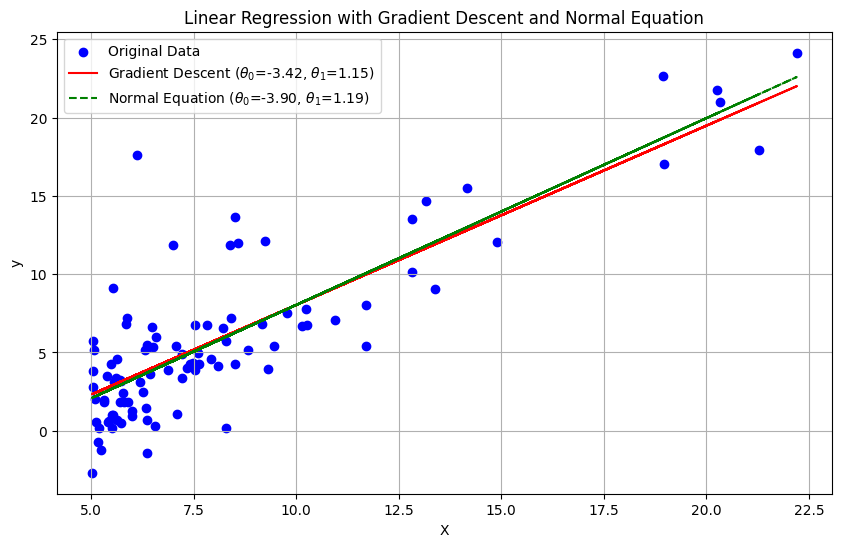

In [233]:
# -------------------- 图像化呈现 --------------------
plt.figure(figsize=(10, 6)) # 设置图像大小
# 绘制原始数据点
plt.scatter(X, y, color='blue', label='Original Data')

# 绘制梯度下降的回归线
y_pred_gd = theta_0_gd + theta_1_gd * X # 预测值
plt.plot(X, y_pred_gd, color='red', label=f'Gradient Descent ($\\theta_0$={theta_0_gd:.2f}, $\\theta_1$={theta_1_gd:.2f})')

# 绘制正规方程的回归线
y_pred_ne = theta_0_ne + theta_1_ne * X  # 预测值
plt.plot(X, y_pred_ne, color='green', linestyle='--', label=f'Normal Equation ($\\theta_0$={theta_0_ne:.2f}, $\\theta_1$={theta_1_ne:.2f})')

# 添加标签和标题
plt.xlabel('X') # 设置x轴标签
plt.ylabel('y') # 设置y轴标签
plt.title('Linear Regression with Gradient Descent and Normal Equation')
plt.legend() # 添加图例
plt.grid(True) # 添加网格线
plt.show() # 显示图像

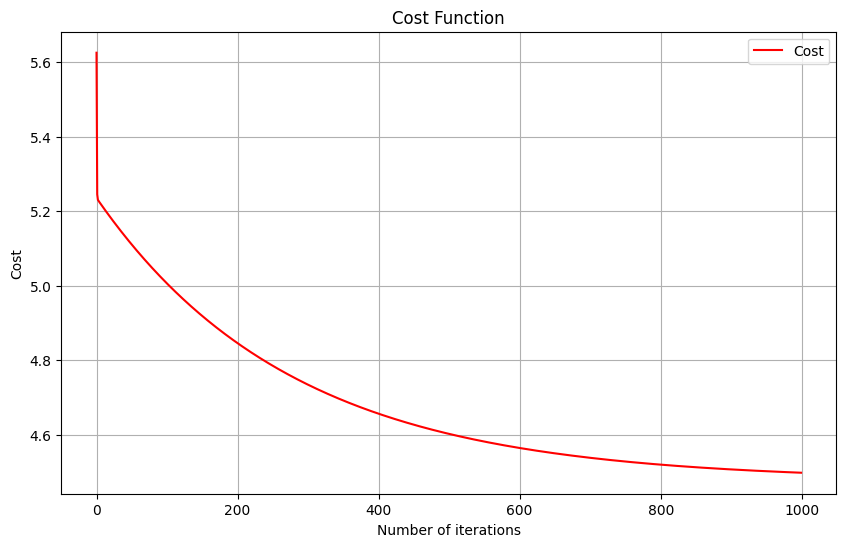

In [234]:
cost = np.array(cost)
cost.shape
plt.figure(figsize=(10, 6)) # 设置图像大小
plt.plot(np.arange(iterations),cost,'r',label = 'Cost') # 绘制成本函数曲线
plt.xlabel('Number of iterations') # 设置x轴标签
plt.ylabel('Cost') # 设置y轴标签
plt.title('Cost Function') # 设置标题
plt.legend() # 添加图例
plt.grid(True) # 设置网格线为可见
plt.show() # 显示图形